# Medical Cost Predictor

Using machine learning to help medical insurers predict costs based on demographic and health attributes.

Step 1: Importing the dataset and dependencies


In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Step 2: Understanding the data we have


In [3]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Step3: Exploratory Data Analysis (EDA)


Step 3.a: Medical Charges Distribution

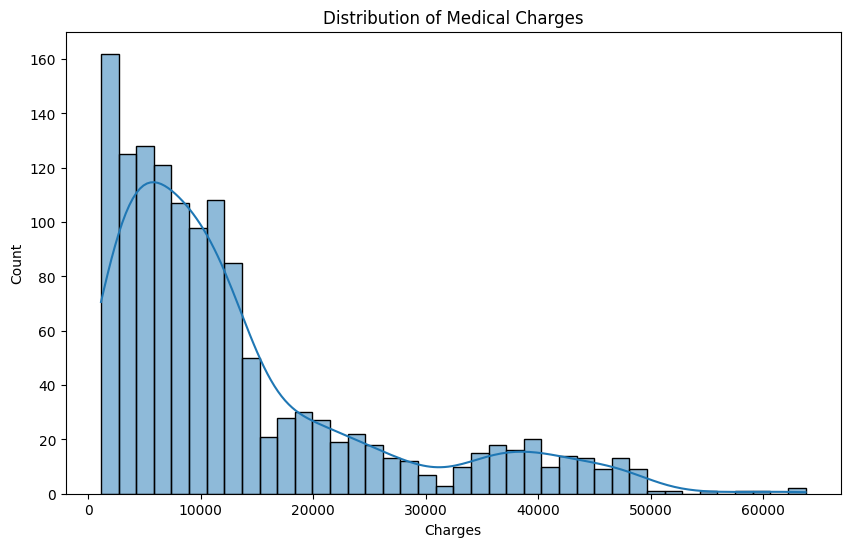

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(insurance['charges'], kde=True, bins=40)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

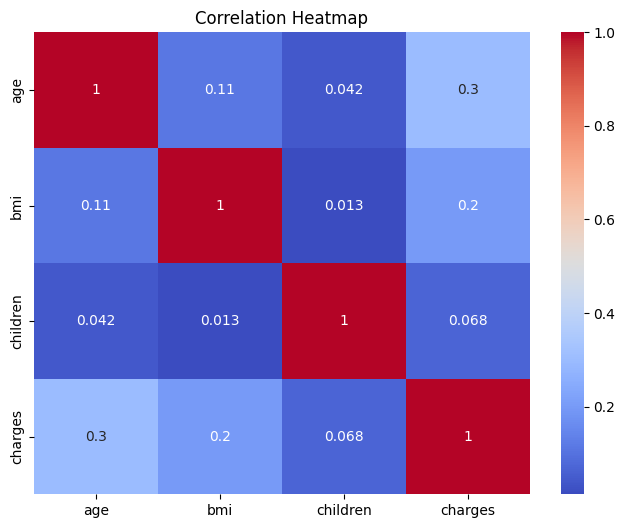

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(insurance.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Step 3.b: Using boxplot to see how different the charges are for smokers and non smokers

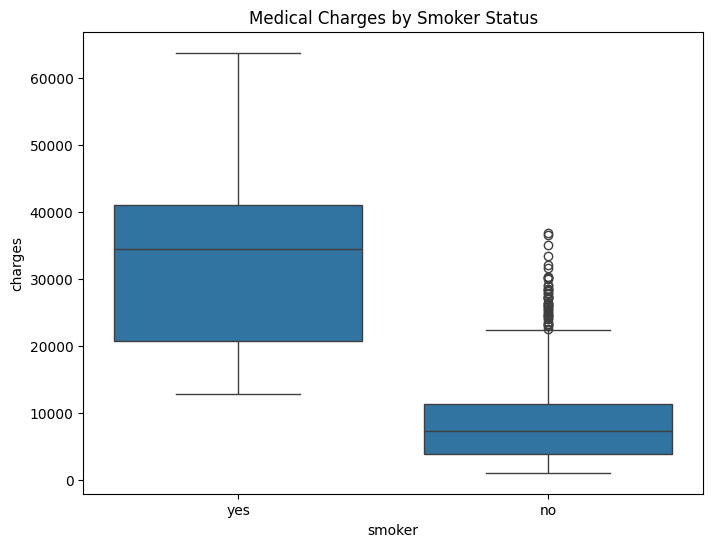

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=insurance, x='smoker', y='charges')
plt.title('Medical Charges by Smoker Status')
plt.show()

Step 3.c: Using boxplot to understand difference in costs by region
Do different regions show different cost distributions?

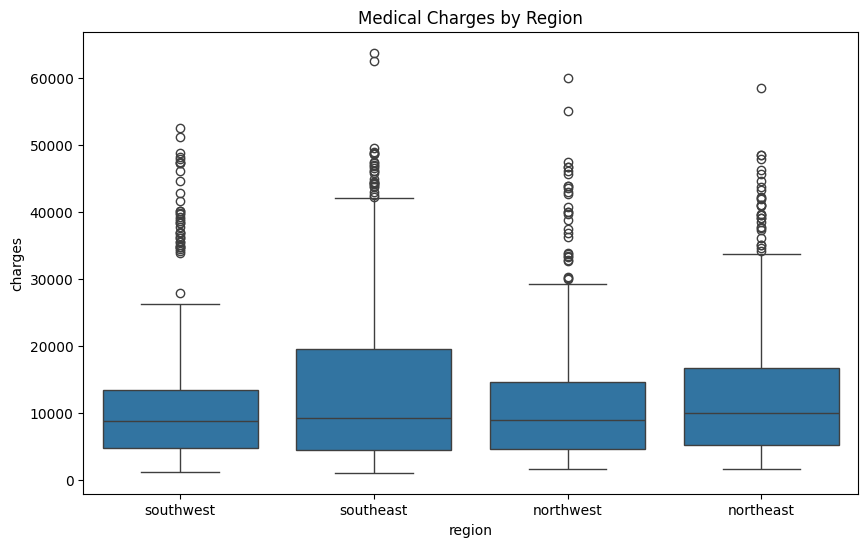

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance, x='region', y='charges')
plt.title('Medical Charges by Region')
plt.show()

Step3.d: Using scatterplot to understand relationship between BMI and the costs
(Non Linear Relationship)

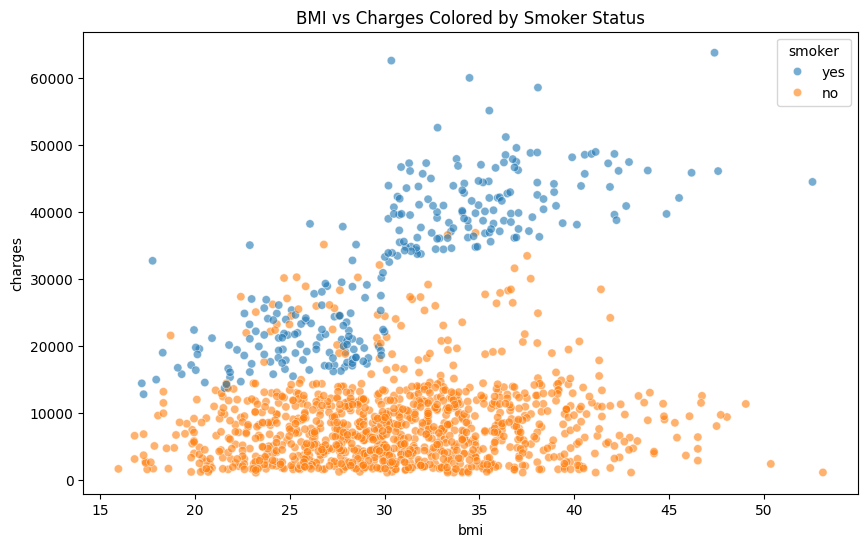

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('BMI vs Charges Colored by Smoker Status')
plt.show()

In [9]:
insurance.shape

(1338, 7)

In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Our categorical features include Gender, Smoker, Region


In [11]:
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-13-2300676848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance["age"])


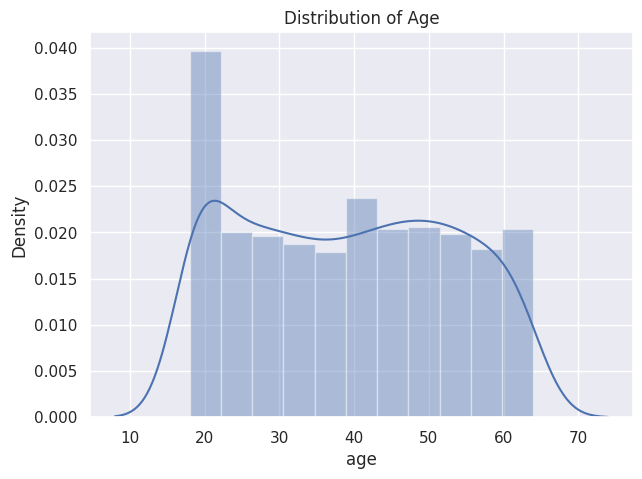

In [13]:
sns.set()
plt.figure(figsize=(7,5))
sns.distplot(insurance["age"])
plt.title("Distribution of Age")
plt.show()

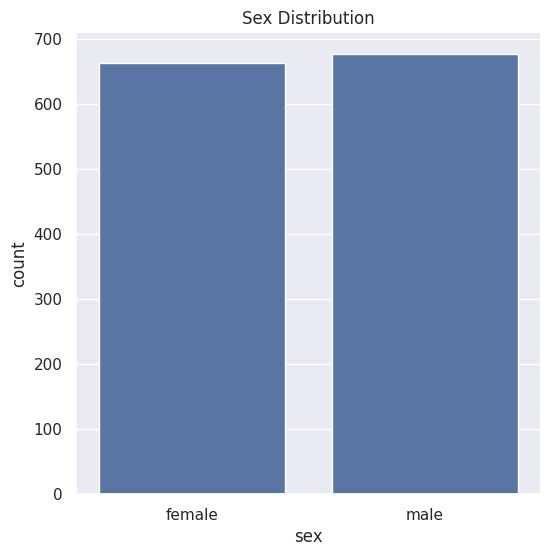

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance)
plt.title('Sex Distribution')
plt.show()

In [15]:
insurance['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-16-2553058788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


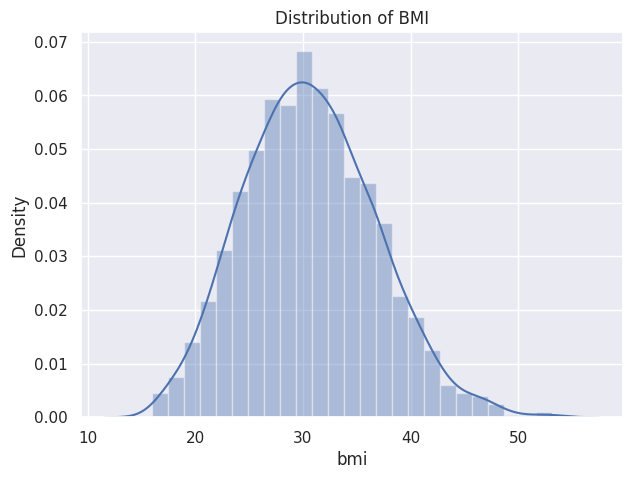

In [16]:
 #  BMI normal range is 18.5 to 24.9
plt.figure(figsize=(7,5))
sns.distplot(insurance['bmi'])
plt.title('Distribution of BMI')
plt.show()

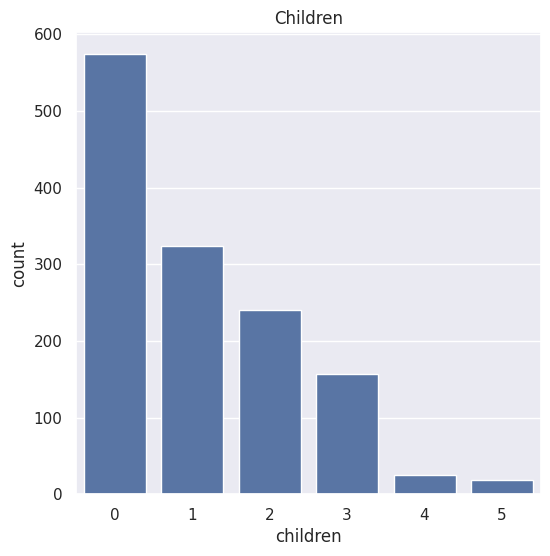

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance)
plt.title('Children')
plt.show()

In [18]:
insurance['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


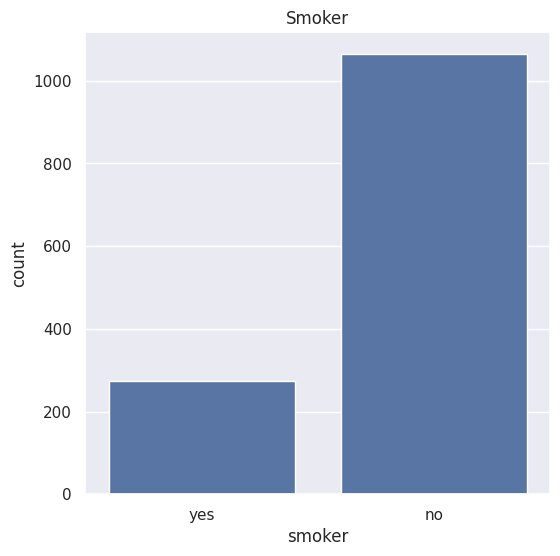

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance)
plt.title('Smoker')
plt.show()

In [20]:
insurance['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


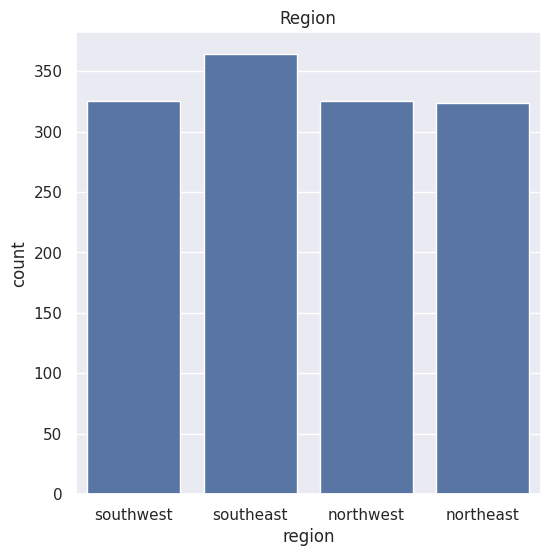

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance)
plt.title('Region')
plt.show()

In [23]:
insurance['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-24-4200499003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


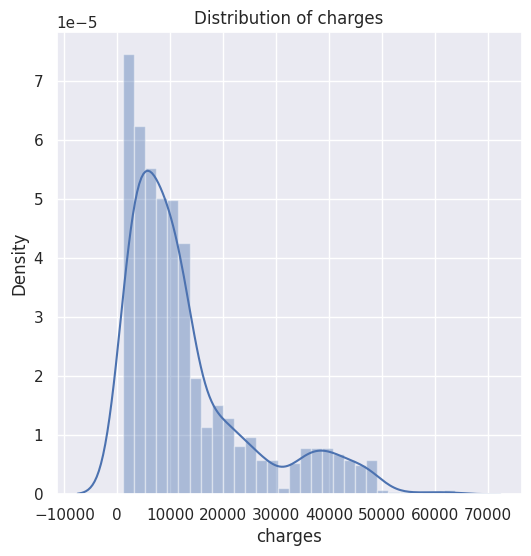

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('Distribution of charges')
plt.show()

Step 4: Encoding the categorial features/ assigning values to them

In [25]:
insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

/tmp/ipython-input-25-565990078.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)
/tmp/ipython-input-25-565990078.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
/tmp/ipython-input-25-565990078.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

Step 5: Segregating features and target values


In [26]:
X = insurance.drop(columns='charges', axis=1)
Y = insurance['charges']

In [27]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Step 6: Finding testing and training data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Step 7: Linear Regression


In [43]:
regression = LinearRegression()

In [32]:
regression.fit(X_train, Y_train)

LinearRegression()

In [33]:
training_data_prediction =regression.predict(X_train)

In [34]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R-square value : ', r2_train)

R-square value :  0.751505643411174


In [35]:
test_data_prediction =regression.predict(X_test)

In [36]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


Step 8: The cost predictor


In [37]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regression.predict(input_data_reshaped)
print(prediction)
print('The insurance cost in USD is ', prediction[0])

[3760.0805765]
The insurance cost in USD is  3760.080576496057


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Step 9: Feature Engineering
(improving model performance)

In [39]:
# One-hot encode categorical variables
insurance_encoded = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)
# Create interaction term: bmi * smoker_yes
if 'smoker_yes' in insurance_encoded.columns:
    insurance_encoded['bmi_smoker'] = insurance_encoded['bmi'] * insurance_encoded['smoker_yes']
insurance_encoded.head()

,age,bmi,children,charges,sex_1,smoker_1,region_1,region_2,region_3
0,19,27.900,0,16884.92400,True,False,True,False,False
1,18,33.770,1,1725.55230,False,True,False,False,False
2,28,33.000,3,4449.46200,False,True,False,False,False
3,33,22.705,0,21984.47061,False,True,False,False,True
4,32,28.880,0,3866.85520,False,True,False,False,True


## Step 10: Model Training and Evaluation
Using multiple models: Linear Regression, Ridge Regression, and Random Forest models to predict insurance charges.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Prepare data
X = insurance_encoded.drop('charges', axis=1)
y = insurance_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    if "Random" in name:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# Results summary
results_df = pd.DataFrame(results)
results_df.sort_values("RMSE", ascending=True).reset_index(drop=True)


,Model,RMSE,MAE,R²
0,Random Forest,4634.955396,2545.874699,0.861623
1,Linear Regression,5796.284659,4181.194474,0.783593
2,Ridge Regression,5796.973599,4182.786131,0.783542


## Step 11: Model Comparison
Random Forest is the best model to go ahead with because
1. Least RMSE and MAE so closest prediction to actual value
2. Highest value of R sqaure so helps calculate variance in charges


## Step 12: Model Interpretability


In [44]:
# Retriving coefficients of the linear models
lin_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_model = Ridge().fit(X_train_scaled, y_train)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Coef': lin_model.coef_,
    'Ridge Coef': ridge_model.coef_,
})

coefficients = coefficients.sort_values('Linear Coef', key=abs, ascending=False)
coefficients.head(10)

,Feature,Linear Coef,Ridge Coef
4,smoker_1,-9558.481409,-9549.259152
0,age,3614.975415,3611.364374
1,bmi,2036.228123,2034.389851
2,children,516.890247,516.769865
6,region_2,284.685890,283.443777
7,region_3,122.521735,121.249887
5,region_1,-65.500362,-66.458545
3,sex_1,9.293101,8.616396


In [45]:
# Comparing the importance of the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
importances = pd.DataFrame({
    'Feature': X.columns,
    'RF Importance': rf_model.feature_importances_
}).sort_values('RF Importance', ascending=False)

importances.head(10)

,Feature,RF Importance
4,smoker_1,0.608618
1,bmi,0.216025
0,age,0.134330
2,children,0.020092
3,sex_1,0.006478
6,region_2,0.005823
7,region_3,0.005019
5,region_1,0.003614


## Insights from my project
Key Takeaways and cost reduction recommendation:
1. **Smoker BMI Combination is a Cost Multiplier**  
   Interaction term (`bmi * smoker`) is one of the top drivers. Smokers with a higher BMI end up paying up to **3x more** than non-smokers with healthy BMI.  
   *Recommendation*: Provide incentives that reduce BMI's specifically for smokers given that they are the high-cost group.

2. **Region makes a small difference**  
   We notice that although the overall region impact is low, those living in the **southeast** consistently pay more, even after controlling for other features indicating potential regional pricing.  
   *Recommendation*: Adjust your premiums a bit based on the region.

3. **Gender Makes No Effect**  
   Although we expected different costs based on gender, we notice that 'sex = Male' shows almost-zero impact. The costs differences are primarly explained by BMI, smoking or age of the patient.

5. **Focus Group: High-BMI Non-Smokers**  
    We notice that non-smokers with higher BMI, pay less than smokers however still pay comparatively more than the rest of the groups.
   *Recommendation*: Target programs for this highpaying, often overlooked group.
These insights hope to help medical insurers and data-driven medical startup companies.